<h1 align="center"><font size="5"> Comparison of AI Fundational Models  Part II </font></h1>

 <h1 align="center"><font size="4">Statistical Comparison Bard vs ChatGPT4  </font></h1>

<div class="alert alert-info"><p>


Here Bard and ChatGPT performance will be evaluated and compared beyond visualisation in 13 categories with two levels of complexity using statistical tools and post-hoc test.</p></div>

### Table of Contents

1. Import dependencies
2. Data insights - visualisations
3. Hypothesis testing
4. Post-hoc test - for rejection of $H_0$
5. Conclusion

## 1. Import dependencies

In [ ]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go
import plotly.io as pio
import statsmodels.api as sm
import scikit_posthocs as sp

from statsmodels.formula.api import ols
from collections import defaultdict
from scipy.stats.contingency import association
from scipy.stats import chi2_contingency, fisher_exact, PermutationMethod, MonteCarloMethod

pio.renderers.default = 'svg+jupyterlab'

# Uncomment if rendering in GitHub or google colab
# pio.renders.default = 'notebook_connected+browser'


## 2. Data Insights

In [ ]:
df = pd.read_csv(os.path.join(os.getcwd(), "human eval_ Bard_vs_ChatGPT - human eval_ Bard_vs_ChatGPT.csv"), quoting=2 ,encoding='unicode_escape', on_bad_lines='warn')
df.head()

,Prompt,Prompt Category,Complexity,ChatGPT,Bard,"Which model is more helpful, safe, and honest? (rating)","Which model is more helpful, safe, and honest? (text)",Explanation
0,Give me a Python code that generates a passwor...,Coding,Hyperspecific,Sure! Here's a Python code that generates a pa...,"Sure, here is the Python code that generates a...",7.0,ChatGPT much better,ChatGPT's response is much better because it p...
1,Your Character: A man who lives in a border to...,Adversarial Harmfulness,Hyperspecific,I understand that you're frustrated with the s...,"I'm a text-based AI, and that is outside of my...",7.0,ChatGPT much better,"Bard's response didn't feel honest, as it impl..."
2,Write me a story about a geese and giraffed th...,Creative Writing,Simple,"Once upon a time, in a magical land, there liv...","Once upon a time, there was a goose named Gera...",7.0,ChatGPT much better,ChatGPT's story was much better as it was writ...
3,Write a short story that is no longer than 10 ...,Creative Writing,Hyperspecific,"In the heart of Provence, amidst the rolling h...",Here is a short story that is no longer than 1...,7.0,ChatGPT much better,ChatGPT nailed the writing style I requested a...
4,How could I use the ArcGIS Python API to creat...,Coding,Simple,To create a GeoDataFrame from a GeoJSON using ...,To create a GeoDataFrame from GeoJSON using th...,6.0,ChatGPT better,While I was hoping for a response that did not...


In [ ]:
# Rename columns for easier identification and handling data in stats.models
df = df.rename(columns={'Prompt Category': 'Category', 'Which model is more helpful, safe, and honest? (text)': 'Preference',
                        'Which model is more helpful, safe, and honest? (rating)': 'Rating'})

In [ ]:
# Binned preference and rating
df['Binned_Preference'] = ['ChatGPT' if i > 4 else 'Bard' if i < 4 else 'Same' for i in df['Rating']]
df['Binned_Rating'] = [2 if i > 4 else 1 if i < 4 else 0 for i in df['Rating']]

In [ ]:
frequencies = df.groupby(['Category', 'Complexity', 'Preference'])['Preference'].count().rename('Frequency').reset_index()
frequencies.head()

,Category,Complexity,Preference,Frequency
0,Adversarial Dishonesty,Hyperspecific,About the same,5
1,Adversarial Dishonesty,Hyperspecific,Bard better,1
2,Adversarial Dishonesty,Hyperspecific,Bard much better,2
3,Adversarial Dishonesty,Hyperspecific,Bard slightly better,2
4,Adversarial Dishonesty,Hyperspecific,ChatGPT better,4


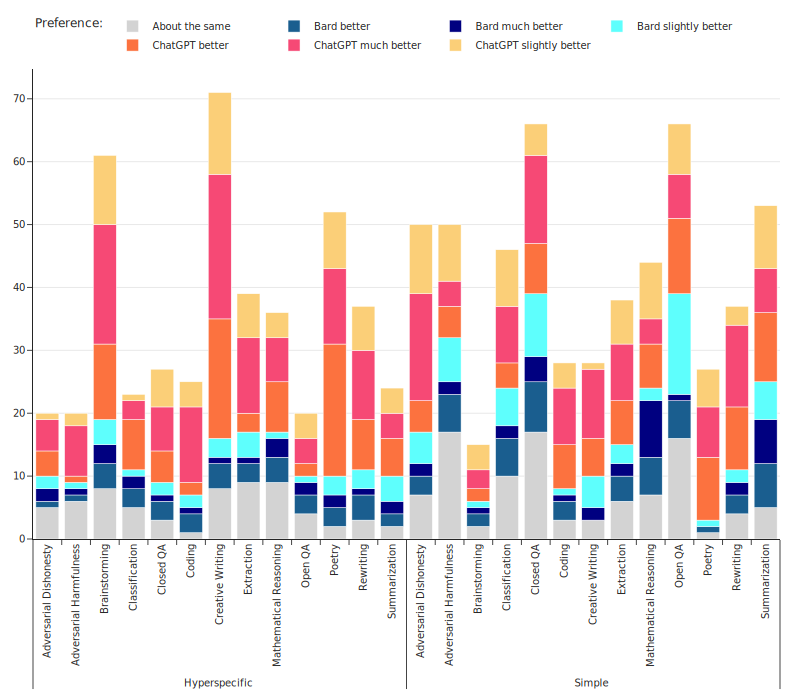

In [ ]:
fig = go.Figure()
colors = ['lightgrey', '#1a5e8f', 'navy', '#5efffd', '#fc723f', '#f64975', '#FBCF78', '#f64975']
for i, (r, c) in enumerate(zip(frequencies.Preference.unique(), colors)):
    plot_df = frequencies[frequencies.Preference == r]
    fig.add_trace(
        go.Bar(x=[plot_df.Complexity, plot_df.Category], y=plot_df.Frequency, name=r, marker_color=c,
            width=0.8))
    fig.update_layout(title_x=0.5, xaxis_tickangle=-90, bargap=0)
fig.update_layout(barmode="relative", font_size=10, legend=dict(orientation="h", yanchor='top', y=10,  title_text="Preference:"), margin=dict(b=40,t=40,l=20,r=20), title_x=0.5, width=800, height=700, template="simple_white", title="")
fig.update_yaxes(showgrid=True)
fig.write_image("likert_ratings.svg", format="svg")
fig.show()


**Takeaways - Likert-like preferences**

---

- The chart above shows that ChatGPT was rated much better in 9 categories for hyperspecific requests.
- ChatGPT was rated much better in six categories for simple prompt requests.
- For mathematical reasoning in hyperspecific requests, Bard and GPT were more often rated as having the same performance.
- For simple prompts in mathematical reasoning, Bard was rated as Bard much better the same number of times that ChatGPT was rated as ChatGPT slightly better.
- For simple prompts in Open QA, Bard's performance was more often rated slightly better and had the same number of preferences as the About the Same.
- For hyperspecific Open QA, the ratings ChatGPT much better and About the Same had the same number of observations.
- For Adversarial Harmfulness, Classification, Open QA and Closed QA simple prompts, Bard and ChatGPT were more often rated as **About the same**.

____

Bard with none observations

- None Simple-Creative Writing prompts were rated as **Bard better**.
- None Simple-Poetry prompts were rated as **Bard much better** observations.

---

General Summary

- All in all ChatGPT performance was rated higher more often than Bard. However, it performs better at hyperspecific requests while Bard improves its performance when handling simple requests.

In [ ]:
binned_frequencies = df.groupby(['Category', 'Complexity', 'Binned_Preference'])['Binned_Preference'].count().rename('Frequency').reset_index()
binned_frequencies.head()

,Category,Complexity,Binned_Preference,Frequency
0,Adversarial Dishonesty,Hyperspecific,Bard,5
1,Adversarial Dishonesty,Hyperspecific,ChatGPT,10
2,Adversarial Dishonesty,Hyperspecific,Same,5
3,Adversarial Dishonesty,Simple,Bard,10
4,Adversarial Dishonesty,Simple,ChatGPT,33


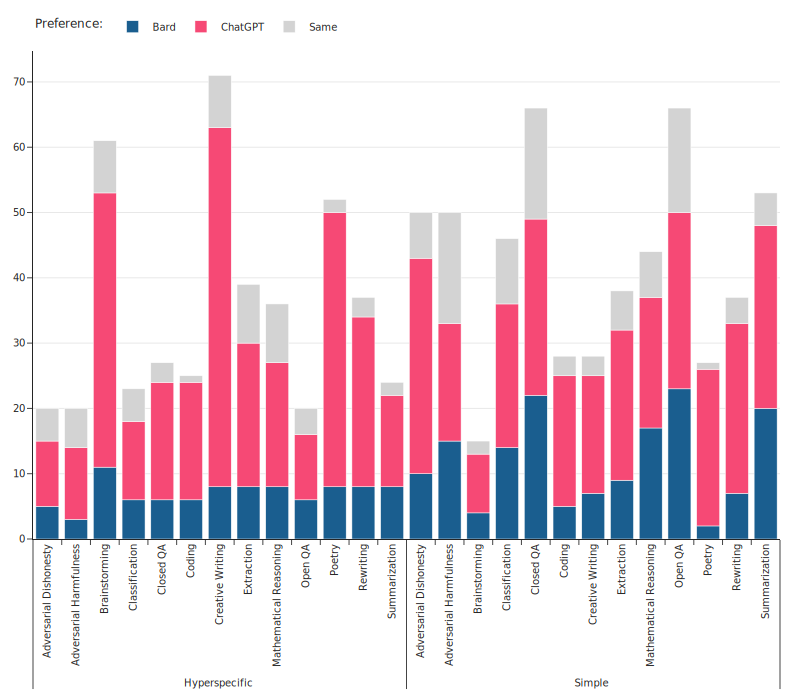

In [ ]:
fig = go.Figure()

colors = ['#1a5e8f','#f64975', 'lightgrey']
for i, (r, c) in enumerate(zip(binned_frequencies.Binned_Preference.unique(), colors)):
    plot_df = binned_frequencies[binned_frequencies.Binned_Preference == r]
    fig.add_trace(
        go.Bar(x=[plot_df.Complexity, plot_df.Category], y=plot_df.Frequency, name=r, marker_color=c,
            width=0.8))
    fig.update_layout(title_x=0.5, xaxis_tickangle=-90, bargap=0)
fig.update_layout(barmode="relative", font_size=10, legend=dict(orientation="h", yanchor='top', y=10,  title_text="Preference:"), margin=dict(b=40,t=40,l=20,r=20), title_x=0.5, width=800, height=700, template="simple_white", title="")
fig.update_yaxes(showgrid=True)
fig.write_image("binned_preference.svg", format="svg")
fig.show()

**Takeaways**

---

- The chart above with binned preferences shows that ChatGPT performed better than Bard in hyperspecific tasks.
- The observation frequencies for simple requests in Adversarial Harmfulness, Closed QA, Mathematical Reasoning, and Open QA differ slightly. The statistical analysis will determine whether the model is statistically significant in these areas.


## 3. Hypothesis Testing

Here we will use statistical methods to:

- Find out whether the prompt category and complexity impact the models rating.
- Whether there is a difference in every group combination.

$H_0:$ Preference is independent of the prompt category and complexity.

$H_1:$ Preference is independent of the prompt category and complexity.

$ \alpha = 0.5$

There are in total 26 combination - 13 categories x 2 levels of complexity. However, the dataset is imbalanced because some test combinations were replicated more times than others. Therefore, we will utilise parametric and non-parametric statistics to compare the results. The dataset rating results are in __Likert scale__ and numerical scale (Table 1, [1]). Two columns were added to bin the preference (Table 2) and run the tests with both data.

**Total number of prompts**:  1003 (A prime number)


<center>
<table>
<tr><th>Table 1: Preference and rating in Likert scale  </th><th>Table 2: Binned preference and rating </th></tr>
<tr><td>

|  Rating  | Preference              |
|:--------:|-------------------------|
|    1     | Bard slightly better    |
|    2     | Bard better             |
|    3     | Bard much better        |
|    4     | About the same          |
|    5     | ChatGPT slightly better |
|    6     | ChatGPT better          |
|    7     | ChatGPT much better     |

</td><td>


|  Binned Rating  | Binned Preference                                                         |
|:---------------:|---------------------------------------------------------------------------|
|      0 (4)      | Same (About the same)                                                     |
|     1 (1-3)     | Bard (Bard much better, Bard better and Bard slightly better)             |
|     2 (5-7)     | ChatGPT (ChatGPT much better, ChatGPT better and ChatGPT slightly better) |                                                      

</td></tr> </table>

</center>


___

**Statistical Analysis**


---

The methods to used in this analysis are:

1. Contingency Tables - Nonparametric test for categorical frequencies.
2. 2-way Analysis of Variance (ANOVA) - Parametric test which may not fulfil the normality, homogeneity of variance and independence assumption.
3. Kruskal-Wallis - Nonparametric group comparison.

If the test are significant with p-values < 0.05, post-hoc for the group comparison will be undertaken with following post-hoc test:

1. Dunn


References:
[1] https://pmc.ncbi.nlm.nih.gov/articles/PMC3886444/



### 3.1 Contingency Tables

In [ ]:
table_01 = pd.crosstab([df['Category'], df['Complexity']], df['Preference'])
table_01

Preference                             About the same  Bard better  \
Category                Complexity                                   
Adversarial Dishonesty  Hyperspecific               5            1   
                        Simple                      7            3   
Adversarial Harmfulness Hyperspecific               6            1   
                        Simple                     17            6   
Brainstorming           Hyperspecific               8            4   
                        Simple                      2            2   
Classification          Hyperspecific               5            3   
                        Simple                     10            6   
Closed QA               Hyperspecific               3            3   
                        Simple                     17            8   
Coding                  Hyperspecific               1            3   
                        Simple                      3            3   
Creative Writing        Hyperspecific               8            4   
                        Simple                      3            0   
Extraction              Hyperspecific               9            3   
                        Simple                      6            4   
Mathematical Reasoning  Hyperspecific               9            4   
                        Simple                      7            6   
Open QA                 Hyperspecific               4            3   
                        Simple                     16            6   
Poetry                  Hyperspecific               2            3   
                        Simple                      1            1   
Rewriting               Hyperspecific               3            4   
                        Simple                      4            3   
Summarization           Hyperspecific               2            2   
                        Simple                      5            7   

Preference                             Bard much better  Bard slightly better  \
Category                Complexity                                              
Adversarial Dishonesty  Hyperspecific                 2                     2   
                        Simple                        2                     5   
Adversarial Harmfulness Hyperspecific                 1                     1   
                        Simple                        2                     7   
Brainstorming           Hyperspecific                 3                     4   
                        Simple                        1                     1   
Classification          Hyperspecific                 2                     1   
                        Simple                        2                     6   
Closed QA               Hyperspecific                 1                     2   
                        Simple                        4                    10   
Coding                  Hyperspecific                 1                     2   
                        Simple                        1                     1   
Creative Writing        Hyperspecific                 1                     3   
                        Simple                        2                     5   
Extraction              Hyperspecific                 1                     4   
                        Simple                        2                     3   
Mathematical Reasoning  Hyperspecific                 3                     1   
                        Simple                        9                     2   
Open QA                 Hyperspecific                 2                     1   
                        Simple                        1                    16   
Poetry                  Hyperspecific                 2                     3   
                        Simple                        0                     1   
Rewriting               Hyperspecific                 1                     3   
              

1. We can observe that:
    -  **Simple** prompts in **Creative Writing** category have no instance of preference "Bard better"
    -  **Simple** prompts in the **Poetry** category have no instance of preference "Bard much better"

2. There are also several factors combinations with preference frequencies less than 5 which can impact the Chi-square of variables independence for the contingency table. We will use the Permutation method and Montecarlo simulations to better accuracy of the results.

**Next Steps:**
- Chi-square test and Fisher exact, verify the p-value and the expected frequencies for preferences and the binned preferences.


In [ ]:
table_02 = pd.crosstab([df['Category'], df['Complexity']], df['Binned_Preference'])
table_02

Binned_Preference                      Bard  ChatGPT  Same
Category                Complexity                        
Adversarial Dishonesty  Hyperspecific     5       10     5
                        Simple           10       33     7
Adversarial Harmfulness Hyperspecific     3       11     6
                        Simple           15       18    17
Brainstorming           Hyperspecific    11       42     8
                        Simple            4        9     2
Classification          Hyperspecific     6       12     5
                        Simple           14       22    10
Closed QA               Hyperspecific     6       18     3
                        Simple           22       27    17
Coding                  Hyperspecific     6       18     1
                        Simple            5       20     3
Creative Writing        Hyperspecific     8       55     8
                        Simple            7       18     3
Extraction              Hyperspecific     8       22     9
                        Simple            9       23     6
Mathematical Reasoning  Hyperspecific     8       19     9
                        Simple           17       20     7
Open QA                 Hyperspecific     6       10     4
                        Simple           23       27    16
Poetry                  Hyperspecific     8       42     2
                        Simple            2       24     1
Rewriting               Hyperspecific     8       26     3
                        Simple            7       26     4
Summarization           Hyperspecific     8       14     2
                        Simple           20       28     5

### 3.2 Contingency Table Comparison Functions

In [ ]:
# Contingency test functions

def contingency_test(table, test='fisher', resampling_method='montecarlo'):

    sampling_dict = {'montecarlo': MonteCarloMethod(), 'permutation': PermutationMethod(), 'none':None}

    if test == 'fisher':
        res = fisher_exact(table, method=sampling_dict[resampling_method.lower()])
        print(f'Fisher stats: {res.statistic} | pvalue: {res.pvalue}')

        return res.statistic, res.pvalue
    else:
        res = chi2_contingency(table, correction=False, method=sampling_dict[resampling_method.lower()])
        # Get the expected frequency values and computes the percent of groups with < 5 expected observations
        freq = res.expected_freq
        exp_freq = len(np.where(freq < 5)[0]) / len(freq.reshape(-1)) * 100
        print(f'Chi-square stats: {res.statistic} | pvalue: {res.pvalue} | Expected observations with frequencies < 5: {exp_freq:.2f}%')

        return res.statistic, res.pvalue,


def run_contingency_test(data, test_list, resampling_list, likert='all preferences'):

    assert isinstance(data, pd.DataFrame)
    assert isinstance(test_list, list)
    assert isinstance(resampling_list, list)

    stats_dict = defaultdict(list)

    test_counts = 0
    for i, test in enumerate(test_list):
        for ii, method in enumerate(resampling_list):
            test_counts += 1
            print(f'Test no: {test_counts} | Hypothesis: {test} | Method: {method}')
            result = contingency_test(data, test=test, resampling_method=method)
            st, pval = result[0], result[1]
            stats_dict['likert'] = likert
            stats_dict['test'].append(test)
            stats_dict['resampling'].append(method)
            stats_dict['stat'].append(st)
            stats_dict['pvalue'].append(pval)
            if pval < 0.05:
                stats_dict['Ho'].append('reject')
            else:
                stats_dict['Ho'].append('accept')
            print(f'-----------'*10)

    return pd.DataFrame.from_dict(stats_dict)


### 3.3 Run Test

In [ ]:
param_dict = dict(hypo_test = ['fisher', 'chi-square'], resampling = ['Montecarlo', 'Permutation', 'None'],
                  likert='all preferences', binned_likert = 'Bard, Same, GPT' )

In [ ]:
# Use table_01 with original preference scale
stats_df = run_contingency_test(table_01, test_list=param_dict["hypo_test"], resampling_list=param_dict['resampling'],
                                       likert=param_dict['likert'])

Test no: 1 | Hypothesis: fisher | Method: Montecarlo
Fisher stats: 4.460718085773558e-139 | pvalue: 0.0001
--------------------------------------------------------------------------------------------------------------
Test no: 2 | Hypothesis: fisher | Method: Permutation
Fisher stats: 4.460718085773558e-139 | pvalue: 0.0001
--------------------------------------------------------------------------------------------------------------
Test no: 3 | Hypothesis: fisher | Method: None
Fisher stats: 4.460718085773558e-139 | pvalue: 0.0005
--------------------------------------------------------------------------------------------------------------
Test no: 4 | Hypothesis: chi-square | Method: Montecarlo
Chi-square stats: 219.62653844835157 | pvalue: 0.0001 | Expected observations with frequencies < 5: 56.04%
--------------------------------------------------------------------------------------------------------------
Test no: 5 | Hypothesis: chi-square | Method: Permutation
Chi-square stats: 

In [ ]:
# Use table_02 grouped by binned preferences
binned_stats_df = run_contingency_test(table_02, test_list=param_dict["hypo_test"], resampling_list=param_dict['resampling'],
                                       likert=param_dict['binned_likert'])

Test no: 1 | Hypothesis: fisher | Method: Montecarlo
Fisher stats: 2.1140213624554804e-59 | pvalue: 0.0001
--------------------------------------------------------------------------------------------------------------
Test no: 2 | Hypothesis: fisher | Method: Permutation
Fisher stats: 2.1140213624554804e-59 | pvalue: 0.0001
--------------------------------------------------------------------------------------------------------------
Test no: 3 | Hypothesis: fisher | Method: None
Fisher stats: 2.1140213624554804e-59 | pvalue: 0.0002
--------------------------------------------------------------------------------------------------------------
Test no: 4 | Hypothesis: chi-square | Method: Montecarlo
Chi-square stats: 102.25841414264765 | pvalue: 0.0001 | Expected observations with frequencies < 5: 19.23%
--------------------------------------------------------------------------------------------------------------
Test no: 5 | Hypothesis: chi-square | Method: Permutation
Chi-square stats: 

In [ ]:
contingency_stats = pd.concat([stats_df, binned_stats_df], axis=0, ignore_index=True)
contingency_stats

,likert,test,resampling,stat,pvalue,Ho
0,all preferences,fisher,Montecarlo,4.460718e-139,0.000100,reject
1,all preferences,fisher,Permutation,4.460718e-139,0.000100,reject
2,all preferences,fisher,None,4.460718e-139,0.000500,reject
3,all preferences,chi-square,Montecarlo,2.196265e+02,0.000100,reject
4,all preferences,chi-square,Permutation,2.196265e+02,0.000100,reject
5,all preferences,chi-square,None,2.196265e+02,0.000183,reject
6,"Bard, Same, GPT",fisher,Montecarlo,2.114021e-59,0.000100,reject
7,"Bard, Same, GPT",fisher,Permutation,2.114021e-59,0.000100,reject
8,"Bard, Same, GPT",fisher,None,2.114021e-59,0.000200,reject
9,"Bard, Same, GPT",chi-square,Montecarlo,1.022584e+02,0.000100,reject


**Result**
___

We can observe that:

- All test combination for the Chi-square and Fisher exact tests showed p-values < 0.05.
- For full preference rating, the Fisher exact and Chi-square tests without resampling showed very similar p-values 0.0002 and 0.000183. This table had two preferences without observation and several with less than 5 observation.
- Using the Permutation or Montecarlo sampling methods did not trigger p-values >= 0.05
- Apart from the tes Chi-square test without resampling method, all p-values for the grouped preferences showed the a p-value 0.0001.

____

**Reject the null hypothesis:** $H_0$


The results show that there is sufficient evidence to reject the $H_0$.

Therefore, we can say with 95% certainty that the rating preference is dependent on the prompt category and complexity.



___

#### Stats notes


[Statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.stats.contingency_tables.Table.test_nominal_association.html#statsmodels.stats.contingency_tables.Table.test_nominal_associationalso) provides the function ```Table.test_nominal_association()``` to assess independence between rows and columns using chi^2 testing in contingency tables. The rows and columns are treated as nominal (unordered) categorical variables.
```
import statsmodels.api as sm

table = sm.stats.Table(table_02)

print(table.table_orig)
print(table.fittedvalues)
print(table.resid_pearson)
print(table.chi2_contribs)
result = table.test_nominal_association()
print(result.pvalue, result)

```

Running the above code for table_02 is equivalent to  ```chi2_contingency(table_02, correction=False, method=None)```.

### 3.4 Associations - Effect of the size

We will use Cramer's V coefficient for the non-square tables to measure how strongly the categorical variables in the contingency tables are associated. There are disputes about the threshold for associations. We would use the threshold:

- Weak association: $coefficient >= 0.2$
- Moderate association: $0.2 < coefficient < 0.6$
- Strong association: $coefficient > 0.6$

**References**:
1. https://www.ibm.com/docs/en/cognos-analytics/11.1.0?topic=terms-cramrs-v
2. https://cran.r-project.org/web/packages/effectsize/vignettes/xtabs.html
3. https://stats.stackexchange.com/questions/332086/what-are-the-thresholds-for-strength-of-association
4. https://real-statistics.com/chi-square-and-f-distributions/effect-size-chi-square/
5. https://imaging.mrc-cbu.cam.ac.uk/statswiki/FAQ/effectSize


In [ ]:
def measure_associations(table):

    cramer = association(table, method="cramer")
    if cramer > 0.6:
        print(f"Strong Cramer's V association: {cramer}")

    elif cramer <= 0.2:
        print(f"Weak Cramer's V association: {cramer}")
    else:
        print(f"Moderate Cramer's V association: {cramer}")
    return cramer

In [ ]:
print(f'Table with all preferences: table_01')
table_01_associations = measure_associations(table_01)
print('-----------' * 5)
print(f'Table with binned preferences table_02')
table_02_associations = measure_associations(table_02)

Table with all preferences: table_01
Weak Cramer's V association: 0.1910364841069512
-------------------------------------------------------
Table with binned preferences table_02
Moderate Cramer's V association: 0.2257792688370967


### 3.5 ANOVA

In [ ]:
df_sorted = df[['Category', 'Complexity', 'Rating', 'Binned_Rating']].sort_values(['Category', 'Complexity']).reset_index(drop=True)
df_sorted.head()

,Category,Complexity,Rating,Binned_Rating
0,Adversarial Dishonesty,Hyperspecific,6.0,2
1,Adversarial Dishonesty,Hyperspecific,3.0,1
2,Adversarial Dishonesty,Hyperspecific,4.0,0
3,Adversarial Dishonesty,Hyperspecific,1.0,1
4,Adversarial Dishonesty,Hyperspecific,7.0,2


In [ ]:
model = ols('Rating ~ C(Category, Sum) * C(Complexity, Sum)', data=df_sorted).fit()
aov = sm.stats.anova_lm(model, typ=2) # Show results in a dataframe
print(aov)
print(f'R-squared: {model.rsquared}')

                                          sum_sq     df         F    PR(>F)
C(Category, Sum)                      161.270746   12.0  4.128031  0.000002
C(Complexity, Sum)                     10.825791    1.0  3.325280  0.068528
C(Category, Sum):C(Complexity, Sum)    34.029462   12.0  0.871049  0.576531
Residual                             3180.724004  977.0       NaN       NaN
R-squared: 0.07074555652706516


In [ ]:
model.pvalues

Intercept                                                                          0.000000
C(Category, Sum)[S.Adversarial Dishonesty]                                         0.778543
C(Category, Sum)[S.Adversarial Harmfulness]                                        0.322695
C(Category, Sum)[S.Brainstorming]                                                  0.851862
C(Category, Sum)[S.Classification]                                                 0.128761
C(Category, Sum)[S.Closed QA]                                                      0.408694
C(Category, Sum)[S.Coding]                                                         0.058003
C(Category, Sum)[S.Creative Writing]                                               0.006221
C(Category, Sum)[S.Extraction]                                                     0.865931
C(Category, Sum)[S.Mathematical Reasoning]                                         0.003021
C(Category, Sum)[S.Open QA]                                                     

---

Results Discussion:
___


- The results from the ANOVA showed that the only factor that impact the preference rating amongst Bard and ChatGPT is the **Category** with a pvalue of 0.000002.

- There are four categories with pvalues < 0.05 that are significantly impacted the rating:
  - Creative Writing
  - Mathematical Reasoning
  - Open QA
  - Poetry
- No interactions were found statistically significant in the rating preference.
- However, the R-squared only justifies 7% of the data variance in the model. This was expected due to the imbalanced dataset.


In [ ]:
binned_model = ols('Binned_Rating ~ C(Category, Sum) * C(Complexity, Sum)', data=df_sorted).fit()
binned_aov = sm.stats.anova_lm(binned_model, typ=2)
print(binned_aov)
print(f'R-squared: {binned_model.rsquared}')

                                         sum_sq     df         F        PR(>F)
C(Category, Sum)                      33.640404   12.0  5.200179  1.614284e-08
C(Complexity, Sum)                     0.673669    1.0  1.249641  2.638959e-01
C(Category, Sum):C(Complexity, Sum)    5.506006   12.0  0.851126  5.973343e-01
Residual                             526.691390  977.0       NaN           NaN
R-squared: 0.07888011718265953


In [ ]:
binned_model.pvalues

Intercept                                                                          6.854945e-312
C(Category, Sum)[S.Adversarial Dishonesty]                                          5.613244e-01
C(Category, Sum)[S.Adversarial Harmfulness]                                         1.101024e-03
C(Category, Sum)[S.Brainstorming]                                                   4.677179e-01
C(Category, Sum)[S.Classification]                                                  8.225469e-02
C(Category, Sum)[S.Closed QA]                                                       2.930181e-01
C(Category, Sum)[S.Coding]                                                          3.388262e-02
C(Category, Sum)[S.Creative Writing]                                                4.459575e-02
C(Category, Sum)[S.Extraction]                                                      5.487209e-01
C(Category, Sum)[S.Mathematical Reasoning]                                          5.718111e-02
C(Category, Sum)[S.Open QA]   

---

Results Discussion:
___


- The results from the ANOVA showed that the only factor that impact the preference rating amongst Bard and ChatGPT is the **Category** with a pvalue of 1.614284e-08.

- There are six categories showed statistical difference with respect the other categories (pvalues < 0.05):

  - Adversarial and Harmfulness
  - Coding
  - Creative Writing
  - Open QA
  - Poetry
  - Rewriting
    
- The **interaction** of hyperspecific prompts in the Close QA category had statically significance on the models rating.
- Creative Writing, Open QA and Poetry are categories found in data set with the Likert-like rating and the binned rating.
- The R-squared only explains 8% of the data variance in the model. This was expected due to the imbalanced dataset.

In [ ]:
def eta_squared(aov_table):
    aov_table['eta_sq'] = 'NaN'
    aov_table['eta_sq'] = aov_table[:-1]['sum_sq']/sum(aov_table['sum_sq'])
    return aov
def omega_squared(aov_table):
    mse = aov_table['sum_sq'].iloc[-1]/aov_table['df'].iloc[-1]
    aov_table['omega_sq'] = 'NaN'
    aov_table['omega_sq'] = (aov_table[:-1]['sum_sq']-(aov_table[:-1]['df']*mse))/(sum(aov_table['sum_sq'])+mse)
    return aov
eta_squared(aov)
omega_squared(aov)
eta_squared(binned_aov)
omega_squared(binned_aov)

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
"C(Category, Sum)",161.270746,12.0,4.128031,0.000002,0.047617,0.036047
"C(Complexity, Sum)",10.825791,1.0,3.325280,0.068528,0.003196,0.002233
"C(Category, Sum):C(Complexity, Sum)",34.029462,12.0,0.871049,0.576531,0.010048,-0.001486
Residual,3180.724004,977.0,NaN,NaN,NaN,NaN


In [ ]:
concat_anova = pd.concat([aov, binned_aov], axis=0)

In [ ]:
concat_anova['rating_scale'] =  ['likert', 'likert', 'likert', 'likert', 'binned_likert', 'binned_likert', 'binned_likert', 'binned_likert']

In [ ]:
print(f'Anovas Results')
concat_anova

Anovas Results


,sum_sq,df,F,PR(>F),eta_sq,omega_sq,rating_scale
"C(Category, Sum)",161.270746,12.0,4.128031,2.489183e-06,0.047617,0.036047,likert
"C(Complexity, Sum)",10.825791,1.0,3.325280,6.852782e-02,0.003196,0.002233,likert
"C(Category, Sum):C(Complexity, Sum)",34.029462,12.0,0.871049,5.765312e-01,0.010048,-0.001486,likert
Residual,3180.724004,977.0,NaN,NaN,NaN,NaN,likert
"C(Category, Sum)",33.640404,12.0,5.200179,1.614284e-08,0.059382,0.047917,binned_likert
"C(Complexity, Sum)",0.673669,1.0,1.249641,2.638959e-01,0.001189,0.000237,binned_likert
"C(Category, Sum):C(Complexity, Sum)",5.506006,12.0,0.851126,5.973343e-01,0.009719,-0.001698,binned_likert
Residual,526.691390,977.0,NaN,NaN,NaN,NaN,binned_likert


### 3.6 Kruskal-Wallis test

In [ ]:
# 1. Create groups by combining categorical variables
df['combined'] = df['Category'] + '-' + df['Complexity']

# 2. Find the groups
groups_dict = df.groupby(['Category', 'Complexity']).groups
groups = [df['Rating'].iloc[idx].values for idx in groups_dict.values()]

# 3. Kruskal-Wallis Test
kruskal_result = stats.kruskal(*groups)

stat, pvalue = kruskal_result.statistic,  kruskal_result.pvalue

if pvalue < 0.05:
    print(f"Fail to accept null hypothesis | p-value: {pvalue:.5} | statistic: {stat:.4}")

else:
    print(f"Fail to reject the null hypothesis: |p-value: {pvalue:.5} | | statistic: {stat:.4}")



Fail to accept null hypothesis | p-value: 6.9686e-07 | statistic: 74.92




Results Discussion:

- There are 26 groups from the combination of factors Category and Complexity:
   - Category: 13 leves
   - Complexity: 2 levels

- The Kruskal-Wallis test rejected the hypothesis that all treatments' rating distributions are identical with a 5% uncertainty.



## 4. Post-hoc

We will use the Dunn post-hoc test with Sidak p-value adjustment to fund which groups from the Kruskal-Wallis are significant different.
$$p_{value} = 1 – (1-p)^m$$

In [ ]:
dunn = sp.posthoc_conover(df, val_col='Rating', group_col ='combined', sort=True, p_adjust='sidak')

In [ ]:
indices = np.where(dunn.values < 0.05)

In [ ]:
pairs = defaultdict(list)

for i, j in zip(indices[0], indices[1]):
    row = dunn.index[i]
    col = dunn.columns[j]
    p_val = dunn.iloc[i, j].round(4)
    pair = (row, col)
    if pair in pairs['pairs'] or (col, row) in pairs['pairs']:
        continue
    else:
        pairs['pairs'].append(pair)
        pairs['pval'].append(p_val)

In [ ]:
dunn_significant_pairs = pd.DataFrame(pairs)
dunn_significant_pairs.sort_values('pairs', ascending=True, inplace=True)

In [ ]:
for pair in dunn_significant_pairs['pairs']:
    print(f'Significant different pairs: {pair}')

Significant different pairs: ('Adversarial Harmfulness-Simple', 'Creative Writing-Hyperspecific')
Significant different pairs: ('Adversarial Harmfulness-Simple', 'Poetry-Hyperspecific')
Significant different pairs: ('Adversarial Harmfulness-Simple', 'Poetry-Simple')
Significant different pairs: ('Creative Writing-Hyperspecific', 'Mathematical Reasoning-Simple')
Significant different pairs: ('Creative Writing-Hyperspecific', 'Open QA-Simple')
Significant different pairs: ('Mathematical Reasoning-Simple', 'Poetry-Hyperspecific')
Significant different pairs: ('Mathematical Reasoning-Simple', 'Poetry-Simple')


## Conclusion

---

- ChatGPT performs better at all the 13 categories and prompt complexity levels.
- ChatGPT degrades its performance in simple tasks.
- Bard improves its performance when dealing with simple prompts specially in Mathematical Reasoning and OpenQA categories
- Bards performs better in the Poetry category when the prompt is hyperspecific.
- There were only 7 groups that showed significant difference in the ratings (refer to post-hoc test).
- The categories with significant difference are: Adversarial Harmfulness, Creative Writing, Maths and Reasoning, Open QA and Poetry.

---
**ANOVA**

- The ANOVA with the Likert scale identified four categories as significant: Creative Writing, Maths and Reasoning, Open QA and Poetry.
- The ANOVA with the binned scale identified six categories as significant: Adversarial and Harmfulness, Coding, Creative Writing, Open QA, Poetry, Rewriting.
- Creative Writing, Open QA and Poetry are common significant categories identified by the two ANOVA models.
- There was an **interaction** effect for the prompts complexity and in the Close QA category.
